# Race-to-Race Consistency Analysis in 2022 Season (Constructors)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
results = pd.read_csv('archive/results.csv')
drivers = pd.read_csv('archive/drivers.csv')
races = pd.read_csv('archive/races.csv')
constructors = pd.read_csv('archive/constructors.csv')
constructors.rename(columns={'name' : 'team_name'}, inplace=True)
constructors.head()


,constructorId,constructorRef,team_name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [3]:
results_c = pd.merge(results, constructors[['constructorId', 'team_name']], on='constructorId')
results_c = pd.merge(results_c, races[['raceId', 'year', 'name']], on='raceId')
results_c = results_c[results_c['year']==2022]

In [4]:
const_pos = results_c.replace([np.inf, -np.inf], np.nan).groupby(['team_name', 'name'])['positionOrder'].min().reset_index()
const_pos.head()

,team_name,name,positionOrder
0,Alfa Romeo,Abu Dhabi Grand Prix,12
1,Alfa Romeo,Australian Grand Prix,8
2,Alfa Romeo,Austrian Grand Prix,11
3,Alfa Romeo,Azerbaijan Grand Prix,11
4,Alfa Romeo,Bahrain Grand Prix,6


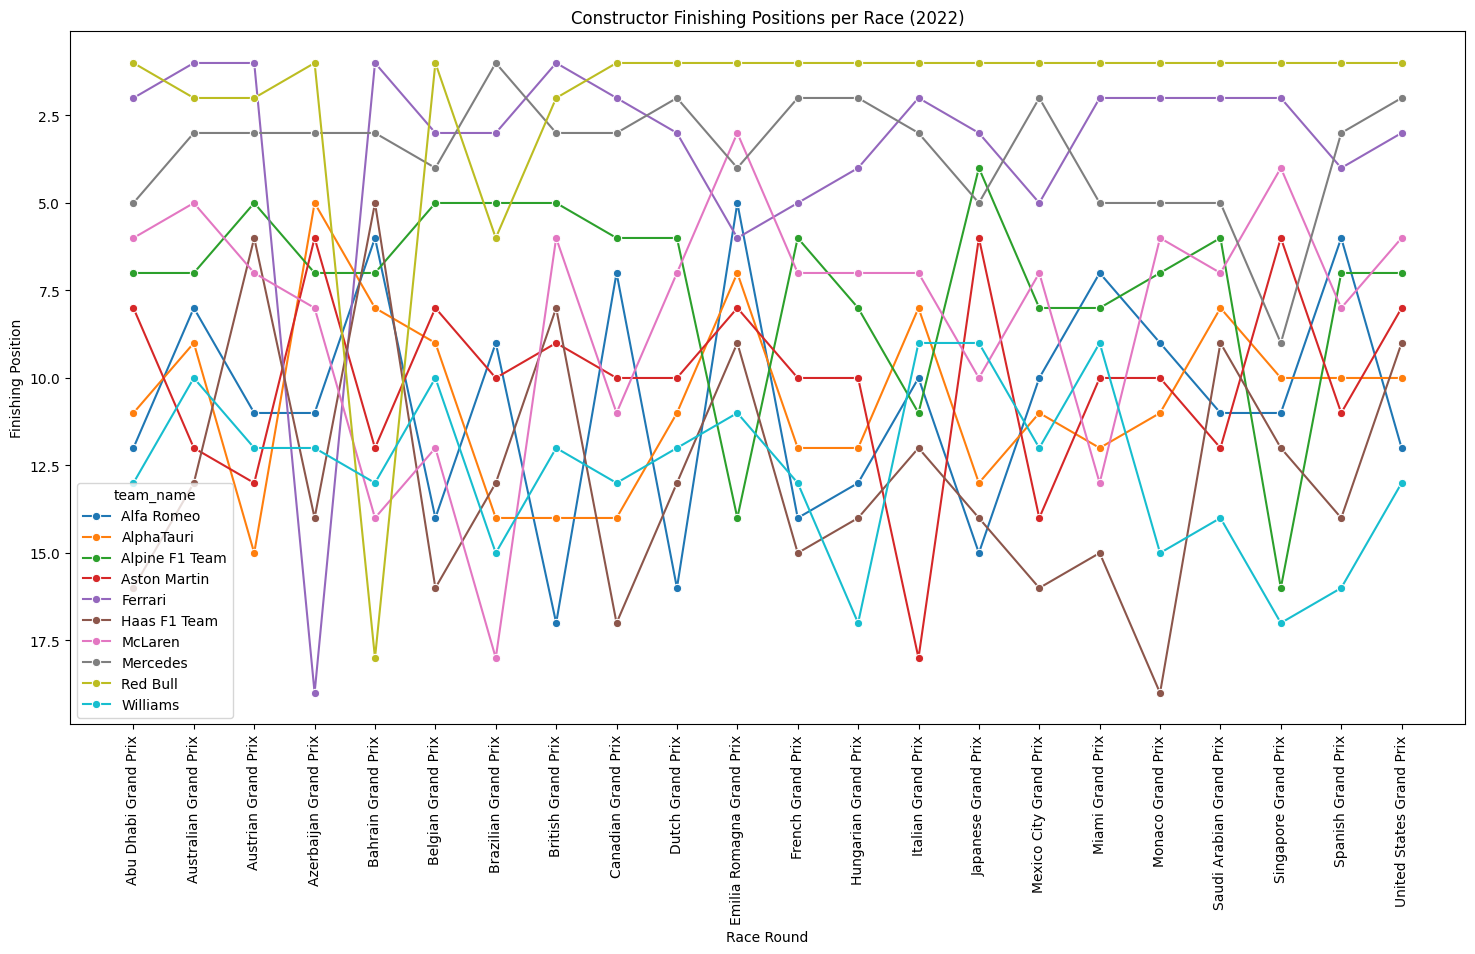

In [5]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    
    plt.figure(figsize=(18,9))
    sns.lineplot(data=const_pos, x='name', y='positionOrder', hue='team_name', marker='o')
    plt.gca().invert_yaxis()  # lower = better
    plt.title(f"Constructor Finishing Positions per Race (2022)")
    plt.ylabel("Finishing Position")
    plt.xlabel("Race Round")
    plt.xticks(rotation=90)
    plt.show()

In [6]:
consistency = const_pos.groupby('team_name')['positionOrder'].std().reset_index(name='position_std').sort_values('position_std')

print(consistency)

        team_name  position_std
7        Mercedes      1.711307
9        Williams      2.403551
1      AlphaTauri      2.555022
3    Aston Martin      2.819613
2  Alpine F1 Team      2.887501
0      Alfa Romeo      3.345864
6         McLaren      3.536146
5    Haas F1 Team      3.630379
8        Red Bull      3.707078
4         Ferrari      3.738185


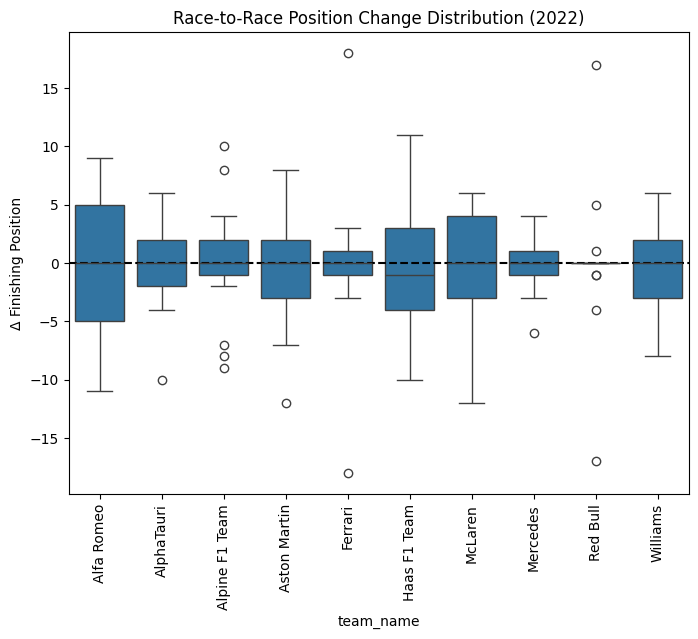

In [7]:
const_pos['change'] = const_pos.groupby('team_name')['positionOrder'].diff()

plt.figure(figsize=(8,6))
sns.boxplot(data=const_pos, x='team_name', y='change')
plt.axhline(0, color="black", linestyle="--")
plt.title(f"Race-to-Race Position Change Distribution (2022)")
plt.ylabel("Δ Finishing Position")
plt.xticks(rotation=90)
plt.show()

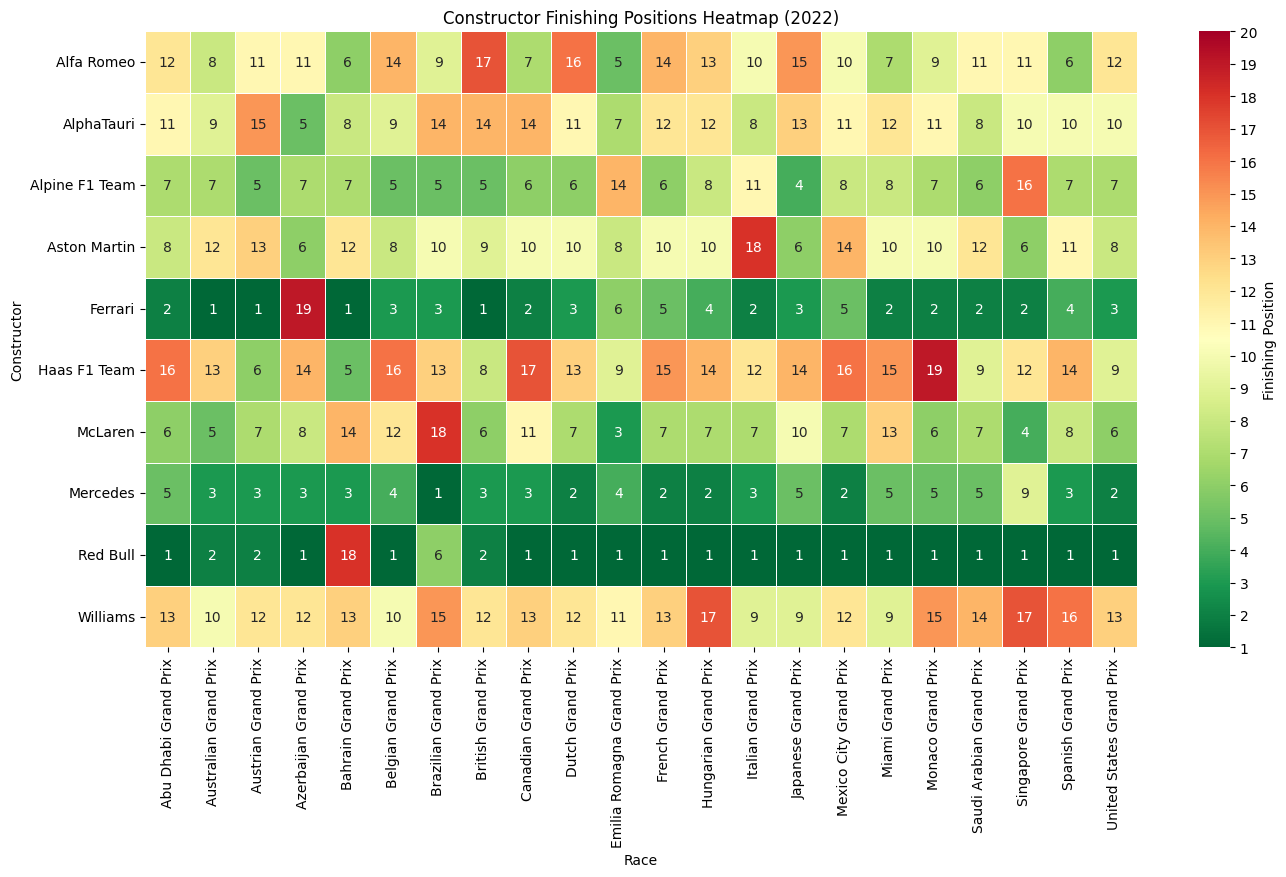

In [8]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    const_pivot = const_pos.pivot(index='team_name', columns='name', values='positionOrder')

    plt.figure(figsize=(16,8))
    ax = sns.heatmap(const_pivot, cmap="RdYlGn_r", cbar_kws={'label': 'Finishing Position'}, linewidths=0.5, annot=True, fmt=".0f", vmin=1, vmax=20)
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks(np.arange(1, 21, 1))
    colorbar.set_ticklabels([str(i) for i in range(1,21)])
    plt.title(f"Constructor Finishing Positions Heatmap (2022)")
    plt.ylabel("Constructor")
    plt.xlabel("Race")
    plt.show()